In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import ast

# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills_list: ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list)

In [24]:
df_copy = df.copy()
df_copy = df[df['job_title_short'] == 'Data Analyst']
df_exploded = df_copy.explode('job_skills')

# df_1 = df_exploded.groupby('job_skills')['salary_year_avg'].agg(['median', 'size']).. less efficient, because using ,.agg doesn't let you decide the column names
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)
skill_stats = skill_stats.sort_values(by= 'skill_count', ascending= False).head(10)
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


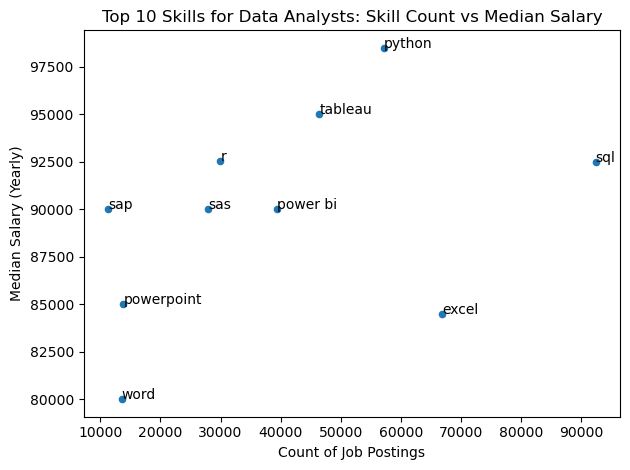

In [27]:
skill_stats.plot(kind= 'scatter', x= 'skill_count', y= 'median_salary')
plt.title('Top 10 Skills for Data Analysts: Skill Count vs Median Salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary (Yearly)')
plt.tight_layout()
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.show()